In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import os 
from datetime import datetime as dt, timedelta

Это транснациональный набор данных, который содержит все транзакции, произошедшие в период с 12.01.2010 по 12.09.2011 для зарегистрированной в Великобритании розничной онлайн-торговли, не являющейся магазином. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.

Этот набор данных взят с сайта Kaggle:https://www.kaggle.com/datasets/ersany/online-retail-dataset/data 

Описание столбцов: 

* InvoiceNo - номер счета,  
* StockCode - код товара, 
* Description - описание продукта, 
* Quantity - количество, 
* InvoiceDate - дата и время выставления счета, 
* UnitPrice - цена за единицу товара, 
* CustomerId - уникальный идентификатор покупателя, 
* Country - Страна проживания клиента 

Ход исследования содержит следующие этапы:

    1) Загрузка данных, изучение общей информации
    
    2) Преобразование данных 
    
    3) Исследовательский анализ данных 
    
  
    
    

## 1 Загрузка данных.

In [2]:
# загружаем данные, выводим первые пять строк
data = pd.read_excel("C:\\Users\\user\\Pictures\\Online Retail.xlsx") 
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [4]:
data.shape

(541909, 8)

In [5]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [6]:
# всего 541909 строк в датасете
len(data)

541909

In [7]:
# проверка на наличие пропусков в данных 
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# посмотрим на все пропуски в столбце Description
data[data['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [9]:
data[data['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [10]:
# посмотрим на количество дубликатов
data.duplicated().sum()

5268

In [11]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


Можно заметить, что указанные строки не являются дубликатами, так как они относятся к столбцу CustomerID-что означает, что один покупатель приобретал несколько товаров

## 2 Преобразование данных


In [12]:
# приведем названия столбцов к нижнему регистру 
data.columns = data.columns.str.lower()
data.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 3.Исследовательский анализ данных

Создадим новый столбец purchase_sum, где посчитаем на какую сумму клиенты приобретали товары 

In [13]:
data['purchase_sum'] = data['unitprice'] * abs(data['quantity'])
data.sample(10)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,purchase_sum
48505,540468,22616,PACK OF 12 LONDON TISSUES,1,2011-01-07 13:55:00,0.85,NaN,United Kingdom,0.85
369355,569026,23086,ZINC STAR T-LIGHT HOLDER,16,2011-09-30 10:18:00,1.25,16101.0,United Kingdom,20.00
165156,550774,22457,NATURAL SLATE HEART CHALKBOARD,6,2011-04-20 13:18:00,2.95,14626.0,United Kingdom,17.70
464288,576085,22144,CHRISTMAS CRAFT LITTLE FRIENDS,12,2011-11-14 08:28:00,2.10,15365.0,United Kingdom,25.20
83271,543300,22691,DOORMAT WELCOME SUNRISE,1,2011-02-07 11:42:00,7.95,13334.0,United Kingdom,7.95
295357,562783,20972,PINK CREAM FELT CRAFT TRINKET BOX,12,2011-08-09 13:22:00,1.25,13018.0,United Kingdom,15.00
21530,538093,22556,PLASTERS IN TIN CIRCUS PARADE,12,2010-12-09 14:49:00,1.65,12682.0,France,19.80
187813,553007,90039B,FIRE POLISHED GLASS BRACELET MONTAN,6,2011-05-12 16:50:00,3.75,14000.0,United Kingdom,22.50
486787,577748,20674,GREEN POLKADOT BOWL,8,2011-11-21 14:24:00,1.25,15159.0,United Kingdom,10.00
182637,552560,15058C,ICE CREAM DESIGN GARDEN PARASOL,10,2011-05-10 11:48:00,3.95,17581.0,United Kingdom,39.50


In [14]:
#Посмотрим на минимальную и максимальную дату соверешния транзакций 
print(f'Минимальная дата совершения транзакции:',data['invoicedate'].min())
print(f'Максимальная дата совершения транзакции:',data['invoicedate'].max())

Минимальная дата совершения транзакции: 2010-12-01 08:26:00
Максимальная дата совершения транзакции: 2011-12-09 12:50:00


В нашем распоряжении данные с 1 декабря 2010 года по 9 декабря 2011 года. 

In [15]:
data.columns = ['invoice_id','stockcode','description','quantity','invoice_date','unit_price','customer_id','country','purchase_sum']

In [16]:
data.head(10)

,invoice_id,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,purchase_sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [17]:
# количество уникальных номеров счетов
data['invoice_id'].nunique()

25900

In [18]:
# количество уникальных покупателей 
data['customer_id'].nunique()

4372

In [19]:
#Как видим, некоторые покупатели имеют по несколько счетов. 

data.groupby('customer_id')['invoice_id'].nunique().reset_index().sort_values(by='invoice_id',ascending=False) 

,customer_id,invoice_id
1895,14911.0,248
330,12748.0,224
4042,17841.0,169
1674,14606.0,128
568,13089.0,118
...,...,...
1141,13877.0,1
2997,16400.0,1
1142,13878.0,1
1149,13886.0,1


Как видим у клиента с индексом 14911 есть 248 разных счетов. Похоже на некую аномалию

In [20]:
data[data['customer_id'] == 14911.0]

,invoice_id,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,purchase_sum
1404,536540,22968,ROSE COTTAGE KEEPSAKE BOX,4,2010-12-01 14:05:00,9.95,14911.0,EIRE,39.8
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,17.7
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,15.3
1407,536540,22355,CHARLOTTE BAG SUKI DESIGN,50,2010-12-01 14:05:00,0.85,14911.0,EIRE,42.5
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,13.5
...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,17.0
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,16.5


In [21]:
# из каких стран совершают покупки
data['country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [22]:
# создадим новую колонку с первым днем месяца
data['month'] = data['invoice_date'].to_numpy().astype('datetime64[M]')
# посмотрим на дату регистрации транзакции (то есть первая совершенная покупка)
data['reg_month'] = data['invoice_date'].min() 
data.head(20)

,invoice_id,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,purchase_sum,month,reg_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01 08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12-01,2010-12-01 08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01 08:26:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,2010-12-01 08:26:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,2010-12-01 08:26:00


In [23]:
# посмотрим на 10 самых платящих пользователей
data.groupby('customer_id').agg({'purchase_sum':'sum'}).sort_values(by='purchase_sum',ascending=False).head(10)

,purchase_sum
customer_id,
16446.0,336942.10
14646.0,280923.02
18102.0,262876.11
17450.0,201619.41
14911.0,155077.50
12346.0,154367.20
12415.0,126103.61
14156.0,121375.12
16029.0,111057.07


In [24]:
data['customer'] = 1 
data.head()

,invoice_id,stockcode,description,quantity,invoice_date,unit_price,customer_id,country,purchase_sum,month,reg_month,customer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01 08:26:00,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01 08:26:00,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01 08:26:00,1


<Axes: >

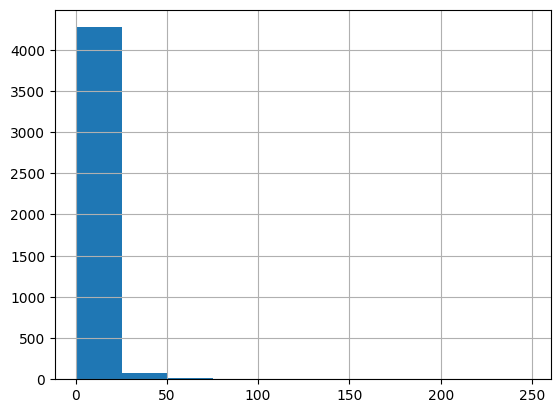

In [25]:
t = data.groupby('customer_id').agg({'invoice_id':'nunique'}).reset_index()
t.columns = ['customer_id','invoice_cnt']
t['invoice_cnt'].hist()

In [26]:
np.percentile(t['invoice_cnt'], 95)

16.0

95 % покупателей имеют 16 и менее номеров счетов

<Axes: ylabel='country'>

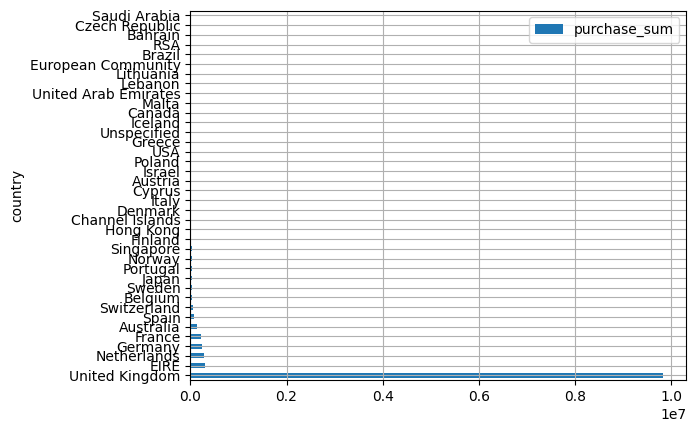

In [27]:
# клиенты из каких стран платят больше всего и меньше всего
countries = data.groupby('country').agg({'purchase_sum':'sum'}).sort_values(by='purchase_sum',ascending=False).reset_index()     # to prevent scientific notation
countries.plot(kind='barh',x='country',grid=True)

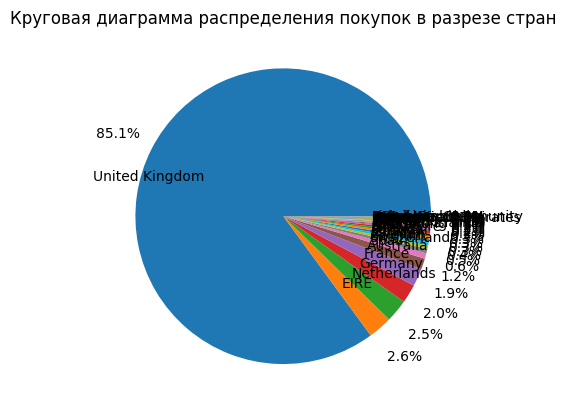

In [28]:
labels = countries['country']
sizes = countries['purchase_sum'] 

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',pctdistance=1.25, labeldistance=.6) 
ax.set_title("Круговая диаграмма распределения покупок в разрезе стран")

plt.show()

In [29]:
df = data.merge(t,how='left',on='customer_id')
df.dtypes

invoice_id              object
stockcode               object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id            float64
country                 object
purchase_sum           float64
month           datetime64[ns]
reg_month       datetime64[ns]
customer                 int64
invoice_cnt            float64
dtype: object

In [30]:
# определяем активных и неактивных клиентов. Будем считать активными тех, кто имеет больше одного номера счета
df['active'] = (df['invoice_cnt'] > 1) * 1
df = df.groupby('customer_id').first().reset_index()
df

,customer_id,invoice_id,stockcode,description,quantity,invoice_date,unit_price,country,purchase_sum,month,reg_month,customer,invoice_cnt,active
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60,2011-01-01,2010-12-01 08:26:00,1,2.0,1
1,12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20,2010-12-01,2010-12-01 08:26:00,1,7.0,1
2,12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60,2010-12-01,2010-12-01 08:26:00,1,4.0,1
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00,2011-11-01,2010-12-01 08:26:00,1,1.0,0
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20,2011-02-01,2010-12-01 08:26:00,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,23.70,2011-03-01,2010-12-01 08:26:00,1,1.0,0
4368,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04,2011-06-01,2010-12-01 08:26:00,1,1.0,0
4369,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,12.75,2011-08-01,2010-12-01 08:26:00,1,3.0,1
4370,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-01-06 14:14:00,0.85,United Kingdom,0.85,2011-01-01,2010-12-01 08:26:00,1,16.0,1


Сгруппируем данные по месяцу совершения транзакции и посмотрим сколько покупателей оформляли транзакции 

In [31]:
df['customer_id'].nunique()

4372

In [32]:
t = df.groupby('month').agg({'customer_id':'nunique'}).cumsum().reset_index() 
t.columns = ['month','customer_cnt_cumsum']
t 



,month,customer_cnt_cumsum
0,2010-12-01,948
1,2011-01-01,1369
2,2011-02-01,1749
3,2011-03-01,2189
4,2011-04-01,2488
5,2011-05-01,2767
6,2011-06-01,3002
7,2011-07-01,3193
8,2011-08-01,3360
9,2011-09-01,3658


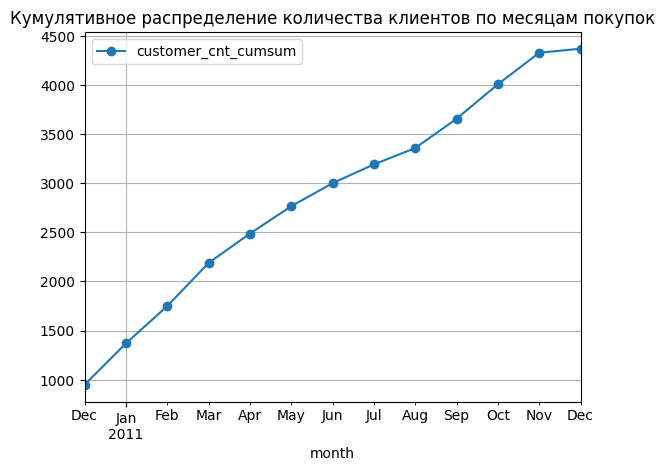

In [33]:
t.plot(x='month',y='customer_cnt_cumsum',style='-o',grid=True) 
plt.title('Кумулятивное распределение количества клиентов по месяцам покупок')
plt.show() 

In [34]:
df

,customer_id,invoice_id,stockcode,description,quantity,invoice_date,unit_price,country,purchase_sum,month,reg_month,customer,invoice_cnt,active
0,12346.0,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60,2011-01-01,2010-12-01 08:26:00,1,2.0,1
1,12347.0,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,Iceland,25.20,2010-12-01,2010-12-01 08:26:00,1,7.0,1
2,12348.0,539318,84992,72 SWEETHEART FAIRY CAKE CASES,72,2010-12-16 19:09:00,0.55,Finland,39.60,2010-12-01,2010-12-01 08:26:00,1,4.0,1
3,12349.0,577609,23112,PARISIENNE CURIO CABINET,2,2011-11-21 09:51:00,7.50,Italy,15.00,2011-11-01,2010-12-01 08:26:00,1,1.0,0
4,12350.0,543037,21908,CHOCOLATE THIS WAY METAL SIGN,12,2011-02-02 16:01:00,2.10,Norway,25.20,2011-02-01,2010-12-01 08:26:00,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,545712,82484,WOOD BLACK BOARD ANT WHITE FINISH,3,2011-03-07 09:52:00,7.90,United Kingdom,23.70,2011-03-01,2010-12-01 08:26:00,1,1.0,0
4368,18281.0,556464,22037,ROBOT BIRTHDAY CARD,12,2011-06-12 10:53:00,0.42,United Kingdom,5.04,2011-06-01,2010-12-01 08:26:00,1,1.0,0
4369,18282.0,562525,21270,ANTIQUE CREAM CUTLERY CUPBOARD,1,2011-08-05 13:35:00,12.75,United Kingdom,12.75,2011-08-01,2010-12-01 08:26:00,1,3.0,1
4370,18283.0,540350,22356,CHARLOTTE BAG PINK POLKADOT,1,2011-01-06 14:14:00,0.85,United Kingdom,0.85,2011-01-01,2010-12-01 08:26:00,1,16.0,1


In [35]:
result = df.groupby(['month','reg_month']).agg({'customer':'sum','purchase_sum':'sum','invoice_cnt':'sum','active':'sum'}).reset_index()

In [36]:
result['reg_month'] = pd.to_datetime(result['reg_month'])
result.dtypes
result['lifetime'] = abs(round(((result['month'] - result['reg_month']).dt.days) / 30)).astype('int')
result['cumsum_cnt'] = result['customer'].cumsum()
result['cumsum_active'] = result['active'].cumsum() 
result['active_pct'] = round(result['cumsum_active'] / result['cumsum_cnt'],2)
result

,month,reg_month,customer,purchase_sum,invoice_cnt,active,lifetime,cumsum_cnt,cumsum_active,active_pct
0,2010-12-01,2010-12-01 08:26:00,948,45602.86,10319.0,837,0,948,837,0.88
1,2011-01-01,2010-12-01 08:26:00,421,98557.65,2603.0,355,1,1369,1192,0.87
2,2011-02-01,2010-12-01 08:26:00,380,13133.81,1811.0,304,2,1749,1496,0.86
3,2011-03-01,2010-12-01 08:26:00,440,13597.14,1854.0,327,3,2189,1823,0.83
4,2011-04-01,2010-12-01 08:26:00,299,9334.15,1084.0,219,4,2488,2042,0.82
5,2011-05-01,2010-12-01 08:26:00,279,12566.37,923.0,204,5,2767,2246,0.81
6,2011-06-01,2010-12-01 08:26:00,235,7828.26,756.0,165,6,3002,2411,0.80
7,2011-07-01,2010-12-01 08:26:00,191,12446.87,510.0,124,7,3193,2535,0.79
8,2011-08-01,2010-12-01 08:26:00,167,5000.30,426.0,100,8,3360,2635,0.78
9,2011-09-01,2010-12-01 08:26:00,298,11011.10,700.0,168,9,3658,2803,0.77


<Figure size 1200x1000 with 0 Axes>

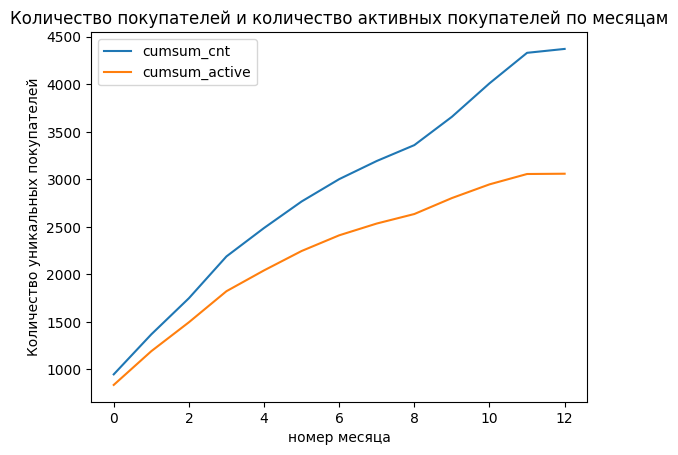

In [37]:
plt.figure(figsize=(12,10))
result[['cumsum_cnt','cumsum_active']].plot() 
plt.title('Количество покупателей и количество активных покупателей по месяцам')
plt.xlabel('номер месяца')
plt.ylabel('Количество уникальных покупателей')
plt.show()

<Figure size 1200x900 with 0 Axes>

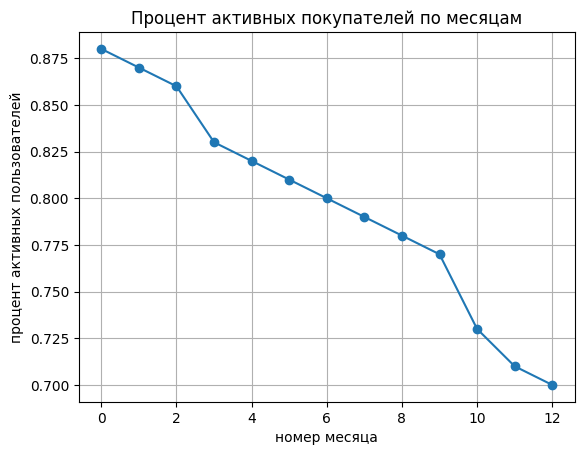

In [38]:
plt.figure(figsize=(12,9))
result[['active_pct']].plot(grid=True,style='-o',legend=False)
plt.title('Процент активных покупателей по месяцам')
plt.xlabel('номер месяца')
plt.ylabel('процент активных пользователей')
plt.show();